In [7]:
import numpy as np
import pandas as pd

In [8]:
pip install scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
import tensorflow as tf
import keras
from pprint import pprint

In [12]:
overall_stats = pd.read_csv('./../data/ml-100k/u.info', header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))
 

Details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [13]:
movie_coulmns = ['user id','movie id','rating','timestamp']
ratings_dataset = pd.read_csv('./../data/ml-100k/u.data', sep='\t',header=None,names=movie_coulmns)
ratings_dataset.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [14]:
ratings_dataset.value_counts()

user id  movie id  rating  timestamp
1        1         5       874965758    1
606      91        5       880926610    1
         144       4       880924664    1
         138       3       880927923    1
         135       5       880926245    1
                                       ..
311      747       3       884364502    1
         739       4       884365823    1
         735       4       884366637    1
         732       4       884365617    1
943      1330      3       888692465    1
Name: count, Length: 100000, dtype: int64

### Movies dataset load

In [15]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
movies_data_columns = d.split(' | ')
movies_data_columns
items_dataset = pd.read_csv("./../data/ml-100k/u.item", sep='|',header=None,names=movies_data_columns,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:

movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
len(items_dataset.groupby(by=movies_data_columns[1:])),len(items_dataset)


(1664, 1682)

### Merged dataset for further observations

In [18]:
merged_dataset = pd.merge(ratings_dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [19]:
merged_dataset[(merged_dataset['movie title'] == 'Chasing Amy (1997)') & (merged_dataset['user id'] == 894)]


,user id,movie id,rating,timestamp,movie title
62716,894,246,4,882404137,Chasing Amy (1997)
90596,894,268,3,879896041,Chasing Amy (1997)


In [20]:
refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [21]:
refined_dataset.value_counts()

user id  movie title                                 rating
1        101 Dalmatians (1996)                       2.0       1
606      Casablanca (1942)                           5.0       1
         Devil's Advocate, The (1997)                4.0       1
         Desperado (1995)                            4.0       1
         Dead Poets Society (1989)                   4.0       1
                                                              ..
311      Star Trek III: The Search for Spock (1984)  5.0       1
         Stand by Me (1986)                          4.0       1
         Speed (1994)                                5.0       1
         Speechless (1994)                           3.0       1
943      Young Guns II (1990)                        3.0       1
Name: count, Length: 99693, dtype: int64

### Encoding users and movie titles is crucial for several important reasons:

- Neural Network Requirements:

  - DNNs require numerical inputs
  - Input features must be in a continuous sequence (no gaps)
  - Missing values can cause training issues


- Memory Efficiency:

  - Converts potentially long string IDs into compact integer indices
  - Reduces memory usage during training
  - Speeds up computations


- Handling Cold Start:

  - Enables handling of new users and movies not seen during training
  - Provides a systematic way to assign new IDs to unknown entities


- Model Performance:

  - Consistent encoding helps prevent data leakage
  - Maintains the relationship between users and movies
  - Enables proper embedding layer initialization


- Training Stability:

  - Sequential IDs ensure consistent embedding lookups
  - Prevents sparse or skipped indices that could affect model convergence
  - Makes batch processing more efficient





In [22]:
user_enc = LabelEncoder()
refined_dataset['user'] = user_enc.fit_transform(refined_dataset['user id'].values)
n_users = refined_dataset['user'].nunique()
n_users

943

In [23]:
movie_enc = LabelEncoder()
refined_dataset['movie'] = movie_enc.fit_transform(refined_dataset['movie title'].values)
n_movies = refined_dataset['movie'].nunique()


In [24]:
refined_dataset['rating'] = refined_dataset['rating'].values.astype(np.float32)
min_rating = min(refined_dataset['rating'])
max_rating = max(refined_dataset['rating'])
n_users, n_movies, min_rating, max_rating

(943, 1664, 1.0, 5.0)

In [25]:
refined_dataset.head()


,user id,movie title,rating,user,movie
0,1,101 Dalmatians (1996),2.0,0,2
1,1,12 Angry Men (1957),5.0,0,3
2,1,"20,000 Leagues Under the Sea (1954)",3.0,0,6
3,1,2001: A Space Odyssey (1968),4.0,0,7
4,1,"Abyss, The (1989)",3.0,0,16


### Splitting the dataset into Test and Training

In [26]:
X = refined_dataset[['user', 'movie']].values
Y = refined_dataset['rating'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=50)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((89723, 2), (9970, 2), (89723,), (9970,))

In [27]:
Y_train.shape

(89723,)

In [28]:
n_factors = 150


X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [29]:
X_train, X_train_array, X_train_array[0].shape


(array([[ 180, 1152],
        [ 487,  389],
        [ 177,  302],
        ...,
        [ 431, 1588],
        [ 232,  399],
        [ 138,  612]]),
 [array([180, 487, 177, ..., 431, 232, 138]),
  array([1152,  389,  302, ..., 1588,  399,  612])],
 (89723,))

### Normalizing the labels


In [30]:
Y_train = (Y_train - min_rating)/(max_rating - min_rating)
Y_test = (Y_test - min_rating)/(max_rating - min_rating)

### Softmax deep neural network


In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:


# # User input and embedding
user = tf.keras.layers.Input(shape=(1,), dtype='int32', name='user_input')

u = tf.keras.layers.Embedding(
    input_dim=n_users,
    output_dim=n_factors,
    embeddings_initializer=tf.keras.initializers.HeNormal(),
    embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
)(user)
u = tf.keras.layers.Reshape((n_factors,))(u)

# Movie input and embedding
movie = tf.keras.layers.Input(shape=(1,), dtype='int32')  # Added dtype here too

m = keras.layers.Embedding(
    input_dim=n_movies,
    output_dim=n_factors,
    embeddings_initializer='he_normal',
    embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
)(movie)
m = tf.keras.layers.Reshape((n_factors,))(m) 

## Rest of the model remains the same
x = tf.keras.layers.Concatenate()([u,m])
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(32, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(16, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(9)(x)
x = tf.keras.layers.Activation(activation='softmax')(x)  # Fixed: lowercase 'softmax'

model = tf.keras.models.Model(inputs=[user,movie], outputs=x)


model.compile(optimizer="Adagrad", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])



In [33]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 150)    │    141,450 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 150)    │    249,600 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 150)       │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 150)       │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 300)       │          0 │ reshape[0][0],    │
│ (Concatenate)       │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 300)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │      9,632 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32)        │          0 │ dense[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        528 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 16)        │          0 │ dense_1[0][0]     │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 16)        │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 9)         │        153 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 9)         │          0 │ dense_2[0][0]     │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 401,363 (1.53 MB)

 Trainable params: 401,363 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss', 
#     factor=0.75, 
#     patience=3, 
#     min_lr=0.000001, 
#     verbose=1)

# checkpoint = tf.keras.callbacks.ModelCheckpoint(
#     'best_model.keras',
#     monitor='val_loss',
#     save_best_only=True,
#     mode='auto'
# )

# history = model.fit(x = X_train_array, y = Y_train, batch_size=128, epochs=70, verbose=1, validation_data=(X_test_array, Y_test)
# ,shuffle=True,callbacks=[reduce_lr, checkpoint])

# Learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.75,
    patience=3,
    min_lr=0.00001,  # 0.000001,
    verbose=1,
    min_delta=1e-4  # Minimum change to qualify as an improvement
)

# Model checkpoint callback
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1,
    save_weights_only=False  # Save the entire model
)

# Training the model with proper input format
history = model.fit(x = X_train_array, 
                    y = Y_train, 
                    batch_size=128, 
                    epochs=80, 
                    verbose=1, 
                    validation_data=(X_test_array, Y_test),
                    shuffle=True,
                    callbacks=[reduce_lr, checkpoint]
                    )

Epoch 1/80


/Users/anuragsharma/.pyenv/versions/movie_recommend/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'keras_tensor_2']. Received: the structure of inputs=('*', '*')
  warnings.warn(


689/701 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1100 - loss: 2.1183
Epoch 1: val_loss improved from inf to 1.94969, saving model to best_model.keras
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1098 - loss: 2.1172 - val_accuracy: 0.0670 - val_loss: 1.9497 - learning_rate: 0.0010
Epoch 2/80
680/701 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0709 - loss: 1.9013
Epoch 2: val_loss improved from 1.94969 to 1.74194, saving model to best_model.keras
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0708 - loss: 1.8997 - val_accuracy: 0.0617 - val_loss: 1.7419 - learning_rate: 0.0010
Epoch 3/80
699/701 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0677 - loss: 1.6894
Epoch 3: val_loss improved from 1.74194 to 1.51844, saving model to best_model.keras
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0677 - loss: 1.6891 - val_accuracy: 0.0617 - val_loss: 1.5184 - learning_rate: 0.0010
Epoch 4/80
700/701 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0647 - loss: 

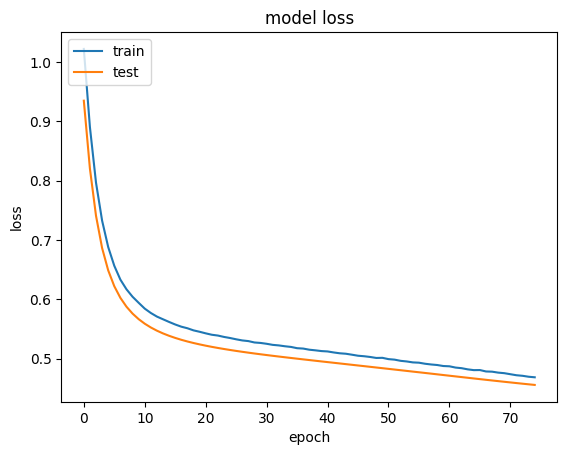

In [35]:
plt.plot(history.history["loss"][5:])
plt.plot(history.history["val_loss"][5:])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [36]:
refined_dataset.head()


,user id,movie title,rating,user,movie
0,1,101 Dalmatians (1996),2.0,0,2
1,1,12 Angry Men (1957),5.0,0,3
2,1,"20,000 Leagues Under the Sea (1954)",3.0,0,6
3,1,2001: A Space Odyssey (1968),4.0,0,7
4,1,"Abyss, The (1989)",3.0,0,16


In [37]:
X_train_array

[array([180, 487, 177, ..., 431, 232, 138]),
 array([1152,  389,  302, ..., 1588,  399,  612])]

In [38]:
user_id = [777]
encoded_user_id = user_enc.transform(user_id)

seen_movies = list(refined_dataset[refined_dataset['user id'] == user_id[0]]['movie'])
print(seen_movies)

[7, 55, 87, 113, 313, 337, 389, 390, 399, 411, 432, 460, 498, 528, 580, 604, 612, 643, 666, 783, 996, 1005, 1032, 1102, 1132, 1157, 1190, 1208, 1251, 1260, 1284, 1302, 1342, 1523, 1558, 1615]


In [39]:
len(refined_dataset['movie'].unique()), min(refined_dataset['movie']), max(refined_dataset['movie'])


(1664, 0, 1663)

In [40]:

unseen_movies = [i for i in range(min(refined_dataset['movie']), max(refined_dataset['movie'])+1) if i not in seen_movies]
print(unseen_movies)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 

In [41]:
len(unseen_movies) + len(seen_movies)


1664

In [42]:
model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]
len(model_input), len(model_input[0])

(2, 1628)

In [43]:
predicted_ratings = model.predict(model_input)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/anuragsharma/.pyenv/versions/movie_recommend/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'keras_tensor_2']. Received: the structure of inputs=('*', '*')
  warnings.warn(


In [44]:
print(predicted_ratings.shape)


(1628, 9)


In [45]:
print(predicted_ratings)


[[7.92290986e-01 2.02559143e-01 8.80366017e-04 ... 5.32412028e-04
  9.54189862e-04 8.27044714e-04]
 [8.01743090e-01 1.93393469e-01 7.77141540e-04 ... 5.28398552e-04
  8.85953603e-04 7.94950931e-04]
 [8.96273136e-01 1.02115706e-01 2.22123970e-04 ... 1.81644311e-04
  2.50720506e-04 2.60654895e-04]
 ...
 [8.56773436e-01 1.39539868e-01 5.11194288e-04 ... 4.23079793e-04
  5.97230741e-04 6.05635752e-04]
 [8.60103488e-01 1.37243614e-01 3.97456781e-04 ... 2.90206983e-04
  4.44153906e-04 4.23449004e-04]
 [8.19488943e-01 1.75113603e-01 8.44608061e-04 ... 5.83759684e-04
  9.13085823e-04 8.78665189e-04]]


In [46]:
predicted_ratings = np.max(predicted_ratings, axis=1)
predicted_ratings
predicted_ratings.shape
sorted_index = np.argsort(predicted_ratings)[::-1]
print(sorted_index)
recommended_movies = movie_enc.inverse_transform(sorted_index)
recommended_movies

[1553  840    2 ... 1285 1251 1365]


array(['Two or Three Things I Know About Her (1966)',
       'Last Klezmer: Leopold Kozlowski, His Life and Music, The (1995)',
       '101 Dalmatians (1996)', ..., 'Scream 2 (1997)',
       'Rock, The (1996)', 'Sound of Music, The (1965)'], dtype=object)

In [47]:

from pprint import pprint
pprint(list(recommended_movies[:20]))

['Two or Three Things I Know About Her (1966)',
 'Last Klezmer: Leopold Kozlowski, His Life and Music, The (1995)',
 '101 Dalmatians (1996)',
 'Bride of Frankenstein (1935)',
 'Mallrats (1995)',
 'Moonlight and Valentino (1995)',
 'Full Monty, The (1997)',
 'Jaws 2 (1978)',
 'Diva (1981)',
 'River Wild, The (1994)',
 'That Darn Cat! (1965)',
 'Of Love and Shadows (1994)',
 'Mercury Rising (1998)',
 "She's the One (1996)",
 'Innocents, The (1961)',
 'Escape from L.A. (1996)',
 "Miller's Crossing (1990)",
 'Big Squeeze, The (1996)',
 'Feast of July (1995)',
 'Judgment Night (1993)']


In [48]:
def recommender_system(user_id, model, n_movies):

  print("")
  print("Movie seen by the User:")
  pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title']))
  print("")

  encoded_user_id = user_enc.transform([user_id])

  seen_movies = list(refined_dataset[refined_dataset['user id'] == user_id]['movie'])
  unseen_movies = [i for i in range(min(refined_dataset['movie']), max(refined_dataset['movie'])+1) if i not in seen_movies]
  model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]
  predicted_ratings = model.predict(model_input)
  predicted_ratings = np.max(predicted_ratings, axis=1)
  sorted_index = np.argsort(predicted_ratings)[::-1]
  recommended_movies = movie_enc.inverse_transform(sorted_index)
  print("---------------------------------------------------------------------------------")
  print("Top "+str(n_movies)+" Movie recommendations for the User "+str(user_id)+ " are:")
  pprint(list(recommended_movies[:n_movies]))
     

In [49]:
user_id= 45
n_movies = 10
recommender_system(user_id,model,n_movies)



Movie seen by the User:
['101 Dalmatians (1996)',
 'Adventures of Pinocchio, The (1996)',
 'Beautiful Girls (1996)',
 'Bed of Roses (1996)',
 'Birdcage, The (1996)',
 'Blue in the Face (1995)',
 "Don't Be a Menace to South Central While Drinking Your Juice in the Hood "
 '(1996)',
 'Down Periscope (1996)',
 'Dragonheart (1996)',
 'Eraser (1996)',
 'Evening Star, The (1996)',
 'Fargo (1996)',
 'Father of the Bride Part II (1995)',
 'First Wives Club, The (1996)',
 'Godfather, The (1972)',
 'Happy Gilmore (1996)',
 'Hercules (1997)',
 'Hunchback of Notre Dame, The (1996)',
 'If Lucy Fell (1996)',
 'Independence Day (ID4) (1996)',
 'James and the Giant Peach (1996)',
 'Jerry Maguire (1996)',
 'Kids in the Hall: Brain Candy (1996)',
 'Leaving Las Vegas (1995)',
 'Men in Black (1997)',
 'Mighty Aphrodite (1995)',
 "Mr. Holland's Opus (1995)",
 'Mulholland Falls (1996)',
 'Muppet Treasure Island (1996)',
 'Mystery Science Theater 3000: The Movie (1996)',
 'Nutty Professor, The (1996)',
 'Ph